In [1]:
import pandas as pd
data=pd.read_csv('all_data.csv', parse_dates = ['Issuance Date'], index_col = ['Issuance Date'])
data

,Unnamed: 0,Quantity
Issuance Date,,
2023-03-30,0,29625.0
2023-03-30,1,7500.0
2023-03-24,2,20.0
2023-03-09,3,178.0
2023-03-09,4,1.0
...,...,...
2019-06-24,816,6776.0
2016-04-19,817,31532.0
2011-10-05,818,1336270.0


In [2]:
data.columns

Index(['Unnamed: 0', 'Quantity'], dtype='object')

In [3]:
data = data.drop('Unnamed: 0', axis = 1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107832 entries, 2023-03-30 to 2011-01-25
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Quantity  107832 non-null  float64
dtypes: float64(1)
memory usage: 1.6 MB


In [5]:
data = data.resample('M').sum()

In [6]:
tab =  data.loc[:'2019-02-11',:]
tab.to_csv('tableau.csv')

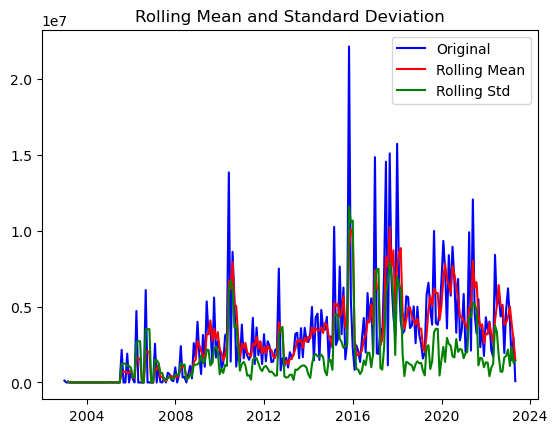

In [7]:
import matplotlib.pyplot as plt

rolling_mean = data['Quantity'].rolling(window=3).mean()
rolling_std = data['Quantity'].rolling(window=3).std()

plt.plot(data['Quantity'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show()

In [8]:
data

,Quantity
Issuance Date,
2002-12-31,125000.0
2003-01-31,0.0
2003-02-28,0.0
2003-03-31,0.0
2003-04-30,0.0
...,...
2022-12-31,6201259.0
2023-01-31,4056130.0
2023-02-28,1484600.0


In [9]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data)
adftest[1]

0.2853564254080261

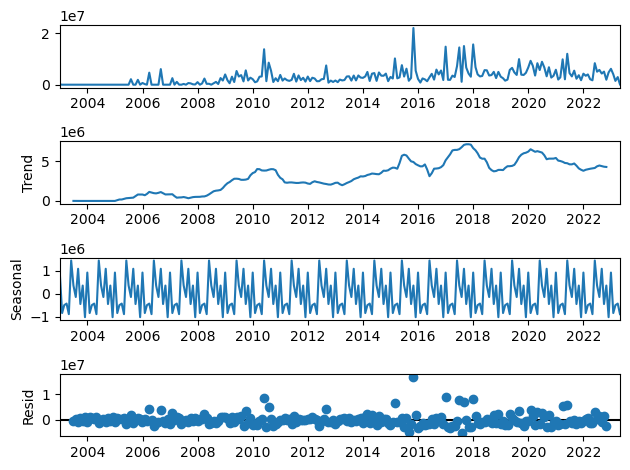

In [10]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data, model = 'additive')
fig = decomposition.plot()
plt.show()

<AxesSubplot: xlabel='Issuance Date'>

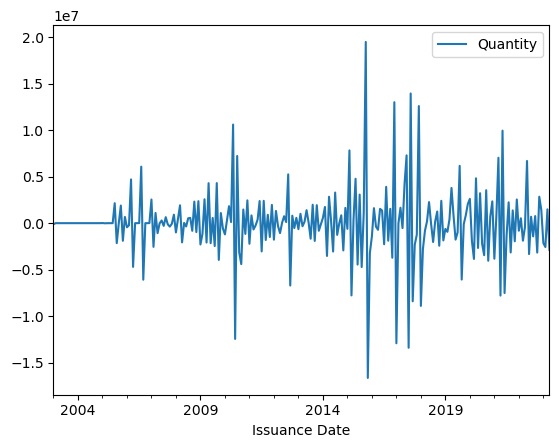

In [11]:
data = data.diff(periods = 1)
data = data.dropna()
data.plot()

In [12]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data)
adftest[1]

2.38295674330052e-11

In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
arr = np.array(data['Quantity'])
arr = arr.reshape(-1,1)
scaler.fit(arr)
data['Quantity'] = scaler.transform(arr)
data

,Quantity
Issuance Date,
2003-01-31,-0.032956
2003-02-28,0.000040
2003-03-31,0.000040
2003-04-30,0.000040
2003-05-31,0.000040
...,...
2022-12-31,0.373147
2023-01-31,-0.566194
2023-02-28,-0.678748


In [14]:
train = data.loc[:'2019-02-11',:]
val = data['2019-05-31': '2023-01-31']
train.shape

(193, 1)

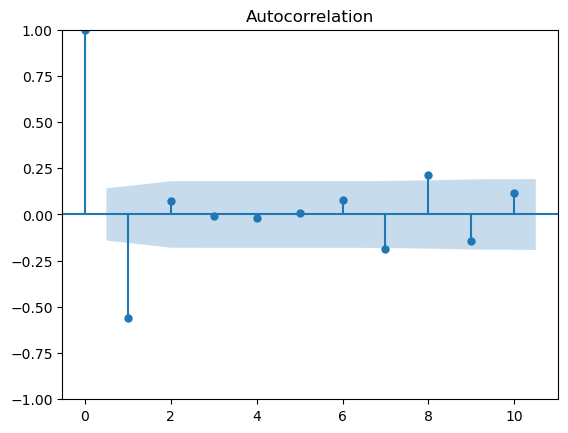

C:\Users\12269\anaconda3\envs\DAB300\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


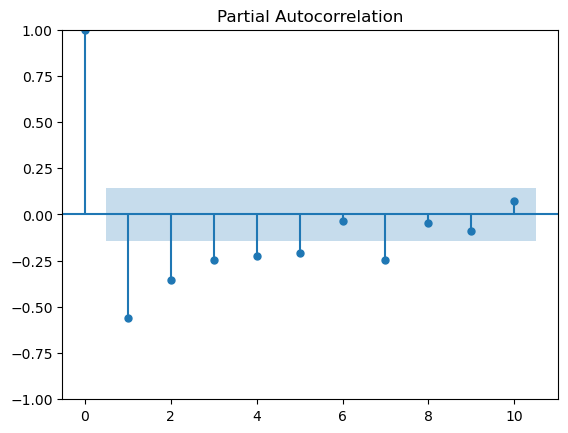

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train, lags=10)
plt.show()

plot_pacf(train, lags=10)
plt.show()

In [16]:
import itertools
p = range(0, 7)
q = range(0,6)
d = range(0,2)
pdq = list(itertools.product(p,d,q))
len(pdq)

84

In [17]:
rmse = []
order = []

In [18]:
from statsmodels.tsa.arima.model import ARIMA

In [19]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
import numpy as np
for comb in pdq:
    model = ARIMA(data, order=comb).fit()
    pred = model.predict(start='2019-05-31', end='2023-01-31')
    error = np.sqrt(mean_squared_error(pred, val))
    order.append(comb)
    rmse.append(error)
rmse

[0.9649156566438428,
 0.6671970541105904,
 0.6648072502335525,
 0.6585717598372784,
 0.6569359861572228,
 0.6568430962026449,
 1.7349901591472727,
 0.9672209810632675,
 0.6706961992250469,
 0.6691161810872396,
 0.6627067647660092,
 0.6608231879049342,
 0.7701839552915694,
 0.6641283259600697,
 0.6630898344341001,
 0.6647150812601897,
 0.6673516769848115,
 0.6697779364461174,
 1.204555587875635,
 0.7720720839695016,
 0.6683087620203884,
 0.6765580331007953,
 0.674890741560397,
 0.6723208467070173,
 0.7074435001855309,
 0.6602591985601434,
 0.6631072957379223,
 0.6435133787317756,
 0.6409411054993187,
 0.674907576468705,
 0.9350075815190432,
 0.709166277563125,
 0.6645405488897128,
 0.6746110956636803,
 0.6735709237756734,
 0.6790909448512892,
 0.7162506082929224,
 0.6551906111399872,
 0.6543247062960634,
 0.6623522370452283,
 0.6434955808906189,
 0.6618128897684175,
 0.9115606271137564,
 0.7175668390782783,
 0.7224702786007664,
 0.6648174850213101,
 0.6782913482109956,
 0.65803737640762

In [20]:
for i in range (len(rmse)):
    if rmse[i] == min(rmse):
        print (i)

64


In [21]:
order[64]

(5, 0, 4)

In [22]:
val

,Quantity
Issuance Date,
2019-05-31,0.213483
2019-06-30,-0.467531
2019-07-31,-0.261283
2019-08-31,1.628473
2019-09-30,-1.602376
2019-10-31,-0.030515
2019-11-30,0.223757
2019-12-31,0.545744
2020-01-31,0.690780


In [23]:
model = ARIMA(data, order=(5,0,4))
results = model.fit()

predictions = results.predict(start='2019-05-31', end='2023-01-31')
print(predictions)
print (len(predictions))

Issuance Date
2019-05-31   -0.304577
2019-06-30   -0.466483
2019-07-31    0.024709
2019-08-31    0.328278
2019-09-30   -1.295433
2019-10-31    0.470003
2019-11-30    0.412982
2019-12-31    0.032914
2020-01-31   -0.309774
2020-02-29   -1.044192
2020-03-31   -0.471074
2020-04-30    0.702276
2020-05-31   -0.751492
2020-06-30    0.044695
2020-07-31   -0.718182
2020-08-31   -0.212085
2020-09-30    0.820731
2020-10-31   -0.272193
2020-11-30    0.806202
2020-12-31    0.590858
2021-01-31   -0.207105
2021-02-28    0.970810
2021-03-31    0.612087
2021-04-30   -1.386406
2021-05-31    1.071836
2021-06-30   -1.760389
2021-07-31    0.301459
2021-08-31    0.938354
2021-09-30   -0.136915
2021-10-31    0.863595
2021-11-30    0.526294
2021-12-31    0.734685
2022-01-31    0.156976
2022-02-28    0.435912
2022-03-31    0.166257
2022-04-30    0.678468
2022-05-31    0.826930
2022-06-30   -1.103034
2022-07-31    0.001168
2022-08-31   -0.107438
2022-09-30    0.112984
2022-10-31    0.069376
2022-11-30    0.8620

In [24]:
np.sqrt(mean_squared_error(predictions, val))

0.6367395456480476

In [25]:
val.mean(), np.sqrt(val.var())

(Quantity   -0.009971
 dtype: float64,
 Quantity    0.975767
 dtype: float64)

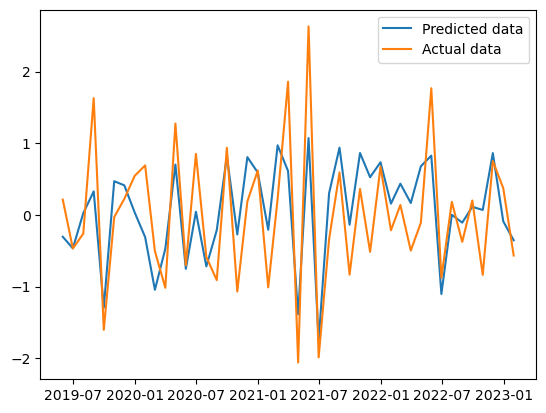

In [26]:
import matplotlib.pyplot as plt
plt.plot(predictions, label = 'Predicted data')
plt.plot(val, label = 'Actual data')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
mae = mean_absolute_error(val, predictions)
r2 = r2_score(val, predictions)
print (mae)
r2

0.5236114572059333


0.5644968819947727

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
for comb in pdq:
    model = SARIMAX(data, order=comb, seasonal_order=(0, 1, 1, 12)).fit()
    pred = model.predict(start='2019-05-31', end='2023-01-31')
    error = np.sqrt(mean_squared_error(pred, val))
    order.append(comb)
    rmse.append(error)
rmse

[0.9649156566438428,
 0.6671970541105904,
 0.6648072502335525,
 0.6585717598372784,
 0.6569359861572228,
 0.6568430962026449,
 1.7349901591472727,
 0.9672209810632675,
 0.6706961992250469,
 0.6691161810872396,
 0.6627067647660092,
 0.6608231879049342,
 0.7701839552915694,
 0.6641283259600697,
 0.6630898344341001,
 0.6647150812601897,
 0.6673516769848115,
 0.6697779364461174,
 1.204555587875635,
 0.7720720839695016,
 0.6683087620203884,
 0.6765580331007953,
 0.674890741560397,
 0.6723208467070173,
 0.7074435001855309,
 0.6602591985601434,
 0.6631072957379223,
 0.6435133787317756,
 0.6409411054993187,
 0.674907576468705,
 0.9350075815190432,
 0.709166277563125,
 0.6645405488897128,
 0.6746110956636803,
 0.6735709237756734,
 0.6790909448512892,
 0.7162506082929224,
 0.6551906111399872,
 0.6543247062960634,
 0.6623522370452283,
 0.6434955808906189,
 0.6618128897684175,
 0.9115606271137564,
 0.7175668390782783,
 0.7224702786007664,
 0.6648174850213101,
 0.6782913482109956,
 0.65803737640762

In [29]:
for i in range (len(rmse)):
    if rmse[i] == min(rmse):
        print (i)

112


In [30]:
order[112]

(2, 0, 4)

In [31]:

model = SARIMAX(data, order=(2, 0, 4), seasonal_order=(0, 1, 1, 12))
results = model.fit()

predictions = results.predict(start='2019-05-31', end='2023-01-31')
print(predictions)
print (len(predictions))

Issuance Date
2019-05-31    0.102730
2019-06-30   -0.480941
2019-07-31   -0.032307
2019-08-31    0.671971
2019-09-30   -1.542543
2019-10-31    0.628325
2019-11-30    0.196877
2019-12-31    0.177672
2020-01-31   -0.600364
2020-02-29   -1.069984
2020-03-31   -0.660394
2020-04-30    0.485943
2020-05-31   -0.420590
2020-06-30    0.082465
2020-07-31   -0.688377
2020-08-31    0.211805
2020-09-30    0.636253
2020-10-31   -0.008346
2020-11-30    0.566758
2020-12-31    0.887122
2021-01-31   -0.279437
2021-02-28    0.846770
2021-03-31    0.492318
2021-04-30   -1.422839
2021-05-31    1.288530
2021-06-30   -1.558183
2021-07-31    0.251297
2021-08-31    1.137828
2021-09-30   -0.204687
2021-10-31    0.921807
2021-11-30    0.284532
2021-12-31    0.995245
2022-01-31   -0.076682
2022-02-28    0.320835
2022-03-31    0.035220
2022-04-30    0.489955
2022-05-31    1.117862
2022-06-30   -1.038814
2022-07-31   -0.086871
2022-08-31    0.117764
2022-09-30   -0.137596
2022-10-31    0.088023
2022-11-30    0.4924

In [32]:
val = val['2019-05-31': '2023-01-31']

In [33]:
compare = pd.concat([val, predictions], axis = 1)
compare

,Quantity,predicted_mean
Issuance Date,,
2019-05-31,0.213483,0.102730
2019-06-30,-0.467531,-0.480941
2019-07-31,-0.261283,-0.032307
2019-08-31,1.628473,0.671971
2019-09-30,-1.602376,-1.542543
2019-10-31,-0.030515,0.628325
2019-11-30,0.223757,0.196877
2019-12-31,0.545744,0.177672
2020-01-31,0.690780,-0.600364


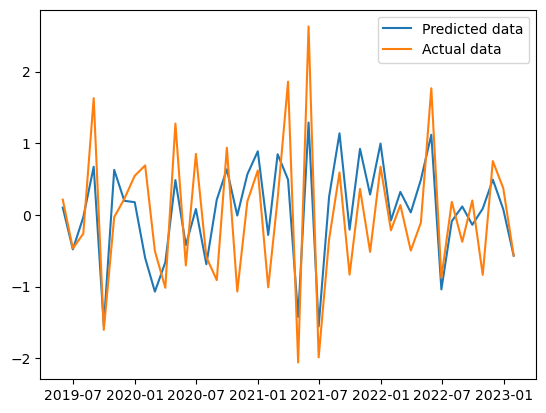

In [34]:
import matplotlib.pyplot as plt
plt.plot(predictions, label = 'Predicted data')
plt.plot(val, label = 'Actual data')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(val, predictions)
r2 = r2_score(val, predictions)
print (mae)
print (r2)

0.5136461395146831
0.5822483440846893


In [37]:
import numpy as np
tab_forecast = np.array([6055977, 5764489, 5542896, 7456725, 5131805, 6581491, 4952192, 6725339, 5062768, 5486502, 6120300, 4987529, 6430975,6139488, 5917895, 7831724, 5506804, 6956490, 5327191, 7100337, 5437767, 5861501, 6495298, 5362528, 6805974, 6514487, 6292894, 8206722, 5881802, 7331489, 5702190, 7475336, 5812766, 6236499, 6870297, 5737527, 7180973, 6889485, 6667892, 8581721, 6256801, 7706488, 6077189, 7850335])
predictions = predictions[:44]
predictions.shape
tab_forecast = tab_forecast.reshape(-1, 1)
tab_forecast = scaler.transform(tab_forecast)
r2_score(tab_forecast, predictions)

-52.79940205545258